In [1]:
import numpy as np
import matplotlib.pyplot as plt

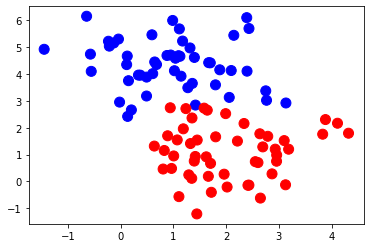

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [3]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create the SVC model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
param_grid

{'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [6]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [7]:
# Fit the model by using the grid search classifier.
# This will take the SVC model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.867, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.933, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [8]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 5, 'gamma': 0.0001}


In [9]:
# List the best score
print(grid_clf.best_score_)

0.9333333333333333


In [10]:
# Make predictions with the hypertuned model
predictions = grid_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

In [11]:
# Score the hypertuned model on the test dataset
grid_clf.score(X_test, y_test)

0.92

# RandomizedSearchCV

In [12]:
big_param_grid = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
big_param_grid

{'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 'gamma': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
        0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
        0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
        0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
        0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
        0.0056, 0.0057, 0.0058, 

In [13]:
# Create the randomized search estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(model, big_param_grid, n_iter=100, random_state=1, verbose=3)
random_clf

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': array...
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099])},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
     

In [14]:
# Fit the model by using the randomized search estimator.
# This will take the Logistic Regression model and try a random sample of combinations of parameters.
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] gamma=0.0035, C=2 ...............................................
[CV] ................... gamma=0.0035, C=2, score=1.000, total=   0.0s
[CV] gamma=0.0035, C=2 ...............................................
[CV] ................... gamma=0.0035, C=2, score=0.867, total=   0.0s
[CV] gamma=0.0035, C=2 ...............................................
[CV] ................... gamma=0.0035, C=2, score=0.800, total=   0.0s
[CV] gamma=0.0035, C=2 ...............................................
[CV] ................... gamma=0.0035, C=2, score=0.933, total=   0.0s
[CV] gamma=0.0035, C=2 ...............................................
[CV] ................... gamma=0.0035, C=2, score=1.000, total=   0.0s
[CV] gamma=0.0092, C=51 ..............................................
[CV] .................. gamma=0.0092, C=51, score=1.000, total=   0.0s
[CV] gamma=0.0092, C=51 ..............................................
[CV] .........

[CV] .... gamma=0.006200000000000001, C=29, score=0.867, total=   0.0s
[CV] gamma=0.006200000000000001, C=29 ................................
[CV] .... gamma=0.006200000000000001, C=29, score=0.933, total=   0.0s
[CV] gamma=0.006200000000000001, C=29 ................................
[CV] .... gamma=0.006200000000000001, C=29, score=1.000, total=   0.0s
[CV] gamma=0.0016, C=25 ..............................................
[CV] .................. gamma=0.0016, C=25, score=1.000, total=   0.0s
[CV] gamma=0.0016, C=25 ..............................................
[CV] .................. gamma=0.0016, C=25, score=0.800, total=   0.0s
[CV] gamma=0.0016, C=25 ..............................................
[CV] .................. gamma=0.0016, C=25, score=0.867, total=   0.0s
[CV] gamma=0.0016, C=25 ..............................................
[CV] .................. gamma=0.0016, C=25, score=0.933, total=   0.0s
[CV] gamma=0.0016, C=25 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] gamma=0.006200000000000001, C=5 .................................
[CV] ..... gamma=0.006200000000000001, C=5, score=1.000, total=   0.0s
[CV] gamma=0.006200000000000001, C=5 .................................
[CV] ..... gamma=0.006200000000000001, C=5, score=0.867, total=   0.0s
[CV] gamma=0.006200000000000001, C=5 .................................
[CV] ..... gamma=0.006200000000000001, C=5, score=0.867, total=   0.0s
[CV] gamma=0.006200000000000001, C=5 .................................
[CV] ..... gamma=0.006200000000000001, C=5, score=0.933, total=   0.0s
[CV] gamma=0.006200000000000001, C=5 .................................
[CV] ..... gamma=0.006200000000000001, C=5, score=1.000, total=   0.0s
[CV] gamma=0.0051, C=81 ..............................................
[CV] .................. gamma=0.0051, C=81, score=1.000, total=   0.0s
[CV] gamma=0.0051, C=81 ..............................................
[CV] .................. gamma=0.0051, C=81, score=0.800, total=   0.0s
[CV] 

[CV] ................... gamma=0.002, C=89, score=1.000, total=   0.0s
[CV] gamma=0.0071, C=67 ..............................................
[CV] .................. gamma=0.0071, C=67, score=1.000, total=   0.0s
[CV] gamma=0.0071, C=67 ..............................................
[CV] .................. gamma=0.0071, C=67, score=0.800, total=   0.0s
[CV] gamma=0.0071, C=67 ..............................................
[CV] .................. gamma=0.0071, C=67, score=0.867, total=   0.0s
[CV] gamma=0.0071, C=67 ..............................................
[CV] .................. gamma=0.0071, C=67, score=0.933, total=   0.0s
[CV] gamma=0.0071, C=67 ..............................................
[CV] .................. gamma=0.0071, C=67, score=1.000, total=   0.0s
[CV] gamma=0.0031000000000000003, C=4 ................................
[CV] .... gamma=0.0031000000000000003, C=4, score=1.000, total=   0.0s
[CV] gamma=0.0031000000000000003, C=4 ................................
[CV] .

[CV] ... gamma=0.0009000000000000001, C=44, score=1.000, total=   0.0s
[CV] gamma=0.0009000000000000001, C=44 ...............................
[CV] ... gamma=0.0009000000000000001, C=44, score=0.800, total=   0.0s
[CV] gamma=0.0009000000000000001, C=44 ...............................
[CV] ... gamma=0.0009000000000000001, C=44, score=0.867, total=   0.0s
[CV] gamma=0.0009000000000000001, C=44 ...............................
[CV] ... gamma=0.0009000000000000001, C=44, score=0.933, total=   0.0s
[CV] gamma=0.0009000000000000001, C=44 ...............................
[CV] ... gamma=0.0009000000000000001, C=44, score=1.000, total=   0.0s
[CV] gamma=0.0048000000000000004, C=6 ................................
[CV] .... gamma=0.0048000000000000004, C=6, score=1.000, total=   0.0s
[CV] gamma=0.0048000000000000004, C=6 ................................
[CV] .... gamma=0.0048000000000000004, C=6, score=0.867, total=   0.0s
[CV] gamma=0.0048000000000000004, C=6 ................................
[CV] .

Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedW


[CV] gamma=0.0043, C=2 ...............................................
[CV] ................... gamma=0.0043, C=2, score=0.800, total=   0.0s
[CV] gamma=0.0043, C=2 ...............................................
[CV] ................... gamma=0.0043, C=2, score=0.933, total=   0.0s
[CV] gamma=0.0043, C=2 ...............................................
[CV] ................... gamma=0.0043, C=2, score=1.000, total=   0.0s
[CV] gamma=0.007200000000000001, C=13 ................................
[CV] .... gamma=0.007200000000000001, C=13, score=1.000, total=   0.0s
[CV] gamma=0.007200000000000001, C=13 ................................
[CV] .... gamma=0.007200000000000001, C=13, score=0.867, total=   0.0s
[CV] gamma=0.007200000000000001, C=13 ................................
[CV] .... gamma=0.007200000000000001, C=13, score=0.867, total=   0.0s
[CV] gamma=0.007200000000000001, C=13 ................................
[CV] .... gamma=0.007200000000000001, C=13, score=0.933, total=   0.0s
[CV] 

[CV] ................... gamma=0.0015, C=7, score=0.933, total=   0.0s
[CV] gamma=0.0015, C=7 ...............................................
[CV] ................... gamma=0.0015, C=7, score=1.000, total=   0.0s
[CV] gamma=0.0007, C=64 ..............................................
[CV] .................. gamma=0.0007, C=64, score=1.000, total=   0.0s
[CV] gamma=0.0007, C=64 ..............................................
[CV] .................. gamma=0.0007, C=64, score=0.800, total=   0.0s
[CV] gamma=0.0007, C=64 ..............................................
[CV] .................. gamma=0.0007, C=64, score=0.867, total=   0.0s
[CV] gamma=0.0007, C=64 ..............................................
[CV] .................. gamma=0.0007, C=64, score=0.933, total=   0.0s
[CV] gamma=0.0007, C=64 ..............................................
[CV] .................. gamma=0.0007, C=64, score=1.000, total=   0.0s
[CV] gamma=0.0021000000000000003, C=62 ...............................
[CV] .

Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedW

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': array...
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099])},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
     

In [15]:
# List the best parameters for this dataset
print(random_clf.best_params_)

{'gamma': 0.0005, 'C': 9}


In [16]:
# List the best score
print(random_clf.best_score_)

0.9333333333333333


In [17]:
# Make predictions with the hypertuned model
predictions = random_clf.predict(X_test)

In [18]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

